- leaky relu / elu

## Planet Kaggle competition

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# http://forums.fast.ai/t/planet-classification-challenge/7824/11
#from fast_gen import * 
#from learner import *
#from pt_models import *
#from dataset_pt import *
#from sgdr_pt import *

from fastai.conv_learner import *

from planet import *

bs=64; f_model = resnet34
#path = "/data/jhoward/fast/planet/"
path = "data/planet/"
#torch.cuda.set_device(1)
torch.cuda.set_device(0)

In [3]:
n=len(list(open(f'{path}train_v2.csv')))-1

In [4]:
# http://forums.fast.ai/t/possible-bug-in-fastai-library-file-transform-py/9748
# get_data_pad defined in planet.py does not work. It leads to NameError: name ‘im’ is not defined. So I'll overwrite it.
def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)

In [5]:
data=get_data_pad(f_model, path, 256, 64, n, 0)  # cv_idx=0

In [6]:
#learn = Learner.pretrained_convnet(f_model, data, metrics=[f2])
learn = ConvLearner.pretrained(f_model, data, metrics=[f2])

### Train

In [8]:
learn.fit(0.2, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.132245   0.115551   0.902146  



[0.115551166, 0.9021464173435563]

In [9]:
learn.sched.plot_lr() # nothing happens...

In [10]:
# learn.unfreeze()

In [11]:
# learn.fit([0.01,0.05,0.2], 12, cycle_len=4)

In [12]:
# learn.fit([1e-4,1e-3,0.01], 4)

In [13]:
for i in range(5):
    data=get_data_pad(f_model, path, 256, 64, n, i) 
    learn = ConvLearner.pretrained(f_model, data, metrics=[f2]) 
    
    learn.fit(0.2, 1, cycle_len=1)
    learn.unfreeze()
    
    # http://forums.fast.ai/t/save-cycle/7779/4
    learn.fit([0.01,0.05,0.2], 5, cycle_len=1, cycle_save_name=f'170809_{i}')# cycle_len parameter is essential to save cycle weights.

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.130124   0.116014   0.901016  



HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.105183   0.094127   0.922685  
    1      0.100414   0.08932    0.92689                      
    2      0.099328   0.087939   0.927754                     
    3      0.095311   0.086314   0.928482                     
    4      0.093081   0.08673    0.928576                     



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.130331   0.119233   0.899351  



HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.104386   0.096879   0.919665  
    1      0.102344   0.092435   0.924868                     
    2      0.096116   0.09036    0.925426                     
    3      0.094649   0.089299   0.925875                     
    4      0.093733   0.089191   0.926045                     



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.133024   0.115962   0.902985  



HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.107963   0.092162   0.925553  
    1      0.103439   0.088565   0.926387                    
    2      0.09974    0.086959   0.927589                     
    3      0.095886   0.084608   0.9302                       
    4      0.094671   0.084358   0.930541                     



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.134056   0.113128   0.904278  



HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.105779   0.091454   0.925166  
    1      0.099554   0.087313   0.928487                     
    2      0.097457   0.086267   0.928797                     
    3      0.09457    0.085149   0.929885                     
    4      0.094711   0.084324   0.931069                     



HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.135451   0.11306    0.906134  



HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.111443   0.090142   0.925711  
    1      0.103512   0.086289   0.929458                    
    2      0.097686   0.083965   0.931603                     
    3      0.096225   0.083355   0.931576                     
    4      0.093431   0.081652   0.932968                     



### Evaluate

In [7]:
name = '170809'

In [8]:
def load_cycle_cv(cv, cycle):
    data=get_data_zoom(f_model, path, 256, 64, n, cv)
    learn.set_data(data)
    learn.load_cycle(f'{name}_{cv}', cycle)
    return data

In [9]:
data = load_cycle_cv(0,1)

In [10]:
val = learn.predict()

In [11]:
f2(val,data.val_y)

#def f2(preds, targs, start=0.17, end=0.24, step=0.01):
#    with warnings.catch_warnings():
#        warnings.simplefilter("ignore")
#        return max([fbeta_score(targs, (preds>th), 2, average='samples')
#                    for th in np.arange(start,end,step)])

0.9235168373730991

In [12]:
# f2(learn.TTA(),data.val_y)

preds,y = learn.TTA() # preds is not log scale ?! (because of this is multi class classification and not use softmax ??)
probs = np.mean(preds,0)
f2(probs,data.val_y)

0.9254871767166228

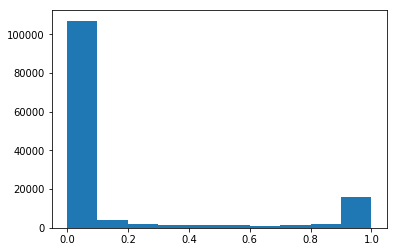

In [13]:
# Let's check distribution
import matplotlib.pyplot as plt
_ = plt.hist([p for pr in probs for p in pr])

In [12]:
# f2(val,data.val_y)

In [13]:
# f2(learn.TTA(),data.val_y) 

In [13]:
test = learn.predict(is_test=True) # (40669, 17)

['agriculture', 'clear', 'habitation', 'primary', 'road']


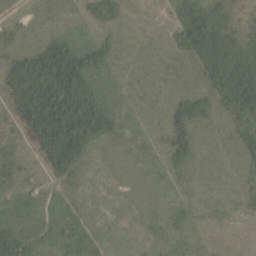

In [15]:
def get_labels(a): return [data.classes[o] for o in a.nonzero()[0]]

# set 1 if output is greather than 0.2,
lbls = test>0.2 # (40669, 17)
idx=9
print(get_labels(lbls[idx]))
PIL.Image.open(path+data.test_dl.dataset.fnames[idx]).convert('RGB')

In [16]:
res = [get_labels(o) for o in lbls]
data.test_dl.dataset.fnames[:5]

['test-jpg/test_37340.jpg',
 'test-jpg/test_24188.jpg',
 'test-jpg/test_13742.jpg',
 'test-jpg/test_39469.jpg',
 'test-jpg/test_40590.jpg']

In [17]:
outp = pd.DataFrame({'image_name': [f[9:-4] for f in data.test_dl.dataset.fnames],
        'tags': [' '.join(l) for l in res]})
outp.head()

,image_name,tags
0,test_37340,agriculture clear primary road
1,test_24188,clear primary
2,test_13742,clear primary
3,test_39469,agriculture bare_ground clear habitation prima...
4,test_40590,agriculture clear cultivation habitation primary


In [18]:
# outp.to_csv('tmp/subm.gz', compression='gzip', index=None)
outp.to_csv(f'{path}tmp/subm.gz', compression='gzip', index=None)

In [19]:
from IPython.display import FileLink

In [20]:
#FileLink('tmp/subm.gz')
FileLink(f'{path}tmp/subm.gz')

/home/ubuntu/fastai/courses/dl1/data/planet/tmp/subm.gz

In [21]:
def cycle_preds(name, cycle, n_tta=4, is_test=False):
    learn.load_cycle(name, cycle)
    return learn.TTA(n_tta, is_test=is_test)

def cycle_cv_preds(cv, n_tta=4, is_test=False):
    data=get_data_pad(f_model, path, 256, 64, n, cv)
    learn.set_data(data)
    return [cycle_preds(f'{name}_{cv}',i, is_test=is_test) for i in range(5)]

- check dogs and cats
- get resize working again with new path structure

In [22]:
%%time
preds_arr=[]
#for i in range(5):
for i in range(2): # save time..
    print(i)
    preds_arr.append(cycle_cv_preds(i, is_test=True)) # test dataset

0
1                                             
CPU times: user 5h 58min 27s, sys: 1h 40min 6s, total: 7h 38min 34s
Wall time: 4h 5min 31s


In [23]:
def all_cycle_cv_preds(end_cycle, start_cycle=0, n_tta=4, is_test=False): # validation dataset
    return [cycle_cv_preds(i, is_test=is_test) for i in range(start_cycle, end_cycle)]

In [24]:
np.savez_compressed(f'{path}tmp/test_preds', preds_arr)

In [25]:
preds_avg = [np.mean(o,0) for o in preds_arr]
test = np.mean(preds_avg,0)

In [28]:
#%time preds_arr = all_cycle_cv_preds(5)
%time preds_arr = all_cycle_cv_preds(2) # save time..

CPU times: user 1h 10min 49s, sys: 19min 54s, total: 1h 30min 44s
Wall time: 49min 16s


In [99]:
#[f2(preds_arr[0][o],data.val_y) for o in range(5)]

preds_avg = [np.mean(o,0) for o in preds_arr] #  [((5, 8095, 17), (8095, 17)), ((5, 8095, 17), (8095, 17))]
[f2(np.mean(preds_avg[o][0], axis=0),load_cycle_cv(o,1).val_y) for o in range(2)] 

[0.9278671055878902, 0.9256552877691161]

In [34]:
preds_avg = [np.mean(o,0) for o in preds_arr] #  [((5, 8095, 17), (8095, 17)), ((5, 8095, 17), (8095, 17))]

In [35]:
#ys = [get_data_zoom(f_model, path, 256, 64, n, cv).val_y for cv in range(5)]
ys = [get_data_zoom(f_model, path, 256, 64, n, cv).val_y for cv in range(2)] # (8095, 17)

In [91]:
#f2s = [f2(o,y) for o,y in zip(preds_avg,ys)]; f2s
f2s = [f2(o,y) for o,y in zip([np.mean(preds_avg[o][0], axis=0) for o in range(2)],ys)]; f2s

[0.9278671055878902, 0.9256552877691161]

In [93]:
#ots = [opt_th(o,y) for o,y in zip(preds_avg,ys)]; ots

# optimize threshold
# http://forums.fast.ai/t/planet-classification-challenge/7824/7
ots = [opt_th(o,y) for o,y in zip([np.mean(preds_avg[o][0], axis=0) for o in range(2)],ys)]; ots 

#def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
#    ths = np.arange(start,end,step)
#    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
#                for th in ths])
#    return ths[idx]

[0.20000000000000004, 0.17]

In [94]:
np.mean(ots)

0.18500000000000003

In [95]:
np.mean(f2s,0)

0.9267611966785032

### End